In [28]:
# import libraries
import numpy as np
import pandas as pd

In [29]:
# read loan file
df = pd.read_csv("D://project//LandingClubCaseStudy//loan.csv")

C:\Users\nishant.ranjan\AppData\Local\Temp\ipykernel_33980\3890635036.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("D://project//LandingClubCaseStudy//loan.csv")


In [30]:
df.info()
#total 111 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [31]:
#check top 5 elements
df.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [32]:
#get count of columns having all null values
df.isna().all()[lambda x: x].count()

np.int64(54)

In [33]:
#drop columns having all null values
df1=df.dropna(axis=1, how='all')

In [34]:
#column count in df1=111-54=57
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [36]:
#columns having any null values.14
df1.isna().any()[lambda x: x].count()

np.int64(14)

In [37]:
# which columns having any null values.14
df1.isna().any()[lambda x: x]

emp_title                     True
emp_length                    True
desc                          True
title                         True
mths_since_last_delinq        True
mths_since_last_record        True
revol_util                    True
last_pymnt_d                  True
next_pymnt_d                  True
last_credit_pull_d            True
collections_12_mths_ex_med    True
chargeoff_within_12_mths      True
pub_rec_bankruptcies          True
tax_liens                     True
dtype: bool

In [38]:
#check count of null values in different columns
df1.isna().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12942
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [ ]:
#lets start some cleaning

In [39]:
#drop desc column
df1 = df1.drop(columns=['desc'])

In [40]:
#drop rows where emp_length is na. Its important factor for risk assessment.
df1 = df1[df1['emp_length'].notna()]

In [41]:
df1.isna().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      1440
emp_length                        0
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
purpose                           0
title                            10
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths                    0
mths_since_last_delinq      

In [42]:
#insert default value in emp_title
df1['emp_title'] = df1['emp_title'].fillna("default_title_na")

In [43]:
df1.isna().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                         0
emp_length                        0
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
purpose                           0
title                            10
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths                    0
mths_since_last_delinq      

In [44]:
#set default values in title
df1['title'] = df1['title'].fillna("default_title_na")

In [45]:
df1.isna().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                         0
emp_length                        0
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
purpose                           0
title                             0
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths                    0
mths_since_last_delinq      

In [46]:
#data clean-up is mostly done
#we can live with NA is rest of columns. Dont think it will hurt us.

In [47]:
#to check any outlier
df1['loan_amnt'].describe()

count    38642.000000
mean     11291.615988
std       7462.136215
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [48]:
import matplotlib.pyplot as plt

{'whiskers': [<matplotlib.lines.Line2D at 0x1d1efed8aa0>,
 'caps': [<matplotlib.lines.Line2D at 0x1d1efed9010>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d1efed8860>],
 'medians': [<matplotlib.lines.Line2D at 0x1d1efed9580>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d1efed9760>],
 'means': []}

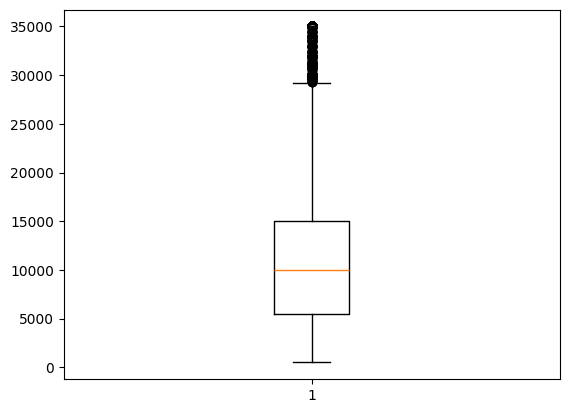

In [49]:
plt.boxplot(df1.loan_amnt)

In [50]:
#want to preserve df1
df4=df1.copy(deep=True)

In [51]:
#remove outliers from dataset. Anything greater than 28000.
df4=df4[~(df4['loan_amnt'] > 28000)]
df4['loan_amnt'].describe()

count    37382.000000
mean     10563.939864
std       6412.638747
min        500.000000
25%       5350.000000
50%       9600.000000
75%      15000.000000
max      28000.000000
Name: loan_amnt, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1d1efe90da0>,
 'caps': [<matplotlib.lines.Line2D at 0x1d1efe911f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d1efe90bf0>],
 'medians': [<matplotlib.lines.Line2D at 0x1d1efe91760>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d1efe919d0>],
 'means': []}

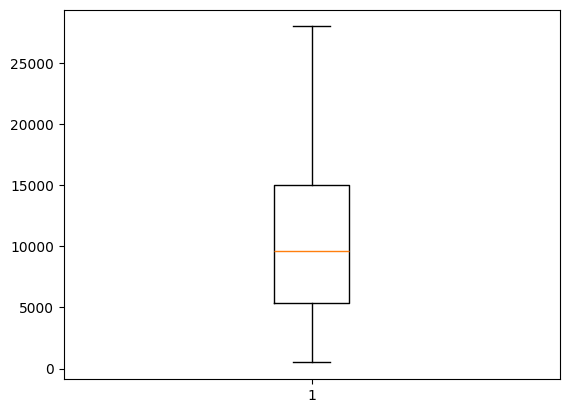

In [52]:
plt.boxplot(df4.loan_amnt)

In [53]:
#cleaning of emp_length data
df4['emp_length'].value_counts()

emp_length
10+ years    8372
< 1 year     4497
2 years      4289
3 years      4001
4 years      3348
5 years      3180
1 year       3178
6 years      2156
7 years      1716
8 years      1417
9 years      1228
Name: count, dtype: int64

In [64]:
#for + "add" 0.1 to show greater than particular year and for < "subract" 0.1 to show less than particular year

def func(a):

    if " years" in a:
        a = a.replace(" years", "")
    else:
        a = a.replace(" year", "")

    if "+" in a:
        a = a.replace("+", "")
        b = float(a) + 0.1
    elif "< " in a:
        a = a.replace("< ", "")
        b = float(a) - 0.1
    else:
        b = float(a)

    return b
    
df4['emp_length_clean'] = df4['emp_length'].apply(lambda x: func(x))
df4['emp_length_clean'].value_counts()

emp_length_clean
10.1    8372
0.9     4497
2.0     4289
3.0     4001
4.0     3348
5.0     3180
1.0     3178
6.0     2156
7.0     1716
8.0     1417
9.0     1228
Name: count, dtype: int64

In [55]:
# Attributes which might give loan default are : grade, verification_status, loan_status, dti, homeownership
# emp_length : higher the value of emp_length, lesser chances of default
# dti : higher the dti, higher the chances of default.
# relationship between verification_status and loan_status 
# relationship between loan_status and grade
# relationship between dti and loan_status

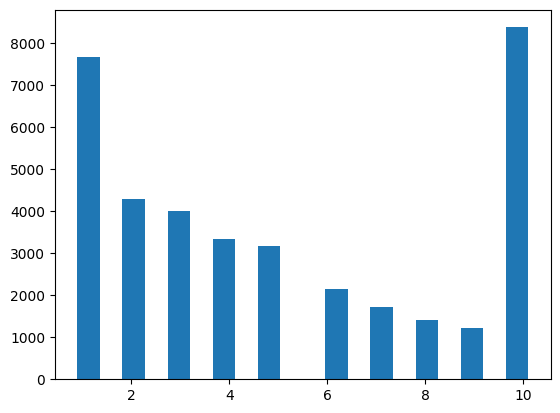

In [91]:
#employee job length univatiate analysis. Quite strange data. Loans are mostly taken by employee who has job
# less than 2 years or around 10+
plt.hist(df4.emp_length_clean,bins=20)
plt.show()

In [160]:
# relationship between "charged off" status and employee service length.
# Its almost directly proportional to the loans distributed amongst various service lenghts.
result=df4[df4['loan_status']=="Charged Off"]['emp_length_clean'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
print(result)

emp_length_clean
10.1    23.8%
0.9     12.0%
2.0     10.7%
3.0     10.3%
1.0      8.7%
4.0      8.6%
5.0      8.5%
6.0      5.8%
7.0      4.7%
8.0      3.8%
9.0      3.0%
Name: proportion, dtype: object


In [177]:
# what kind-off loan were charged off and in what ratio. 
# top 90% risky purpose are : debt_consolidation, other, credit_card, small_business and home_improvement
result=df4[df4['loan_status']=="Charged Off"]['purpose'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
print(result)

purpose
debt_consolidation    49.1%
other                 11.3%
credit_card            9.5%
small_business         8.2%
home_improvement       6.1%
major_purchase         4.1%
car                    3.0%
medical                1.9%
wedding                1.7%
moving                 1.6%
house                  1.0%
educational            1.0%
vacation               1.0%
renewable_energy       0.3%
Name: proportion, dtype: object


In [179]:
result=df4[(df4['loan_status']=="Charged Off") & (df4['purpose'].isin(["debt_consolidation","other","credit_card","small_business","home_improvement"]))]['loan_amnt']\
.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
print(result)

loan_amnt
10000    7.0%
12000    5.9%
15000    5.3%
25000    5.2%
5000     4.9%
         ... 
5275     0.0%
22350    0.0%
7725     0.0%
2125     0.0%
3175     0.0%
Name: proportion, Length: 420, dtype: object


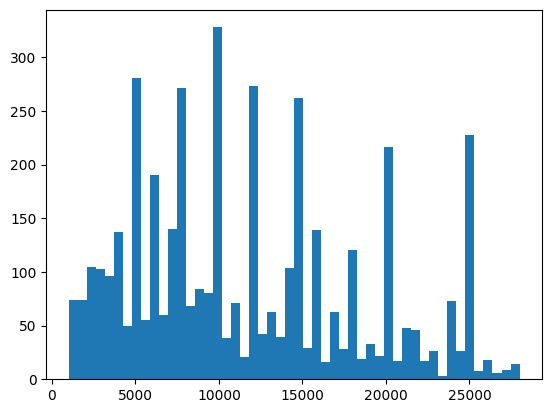

In [183]:
# 10000 loan amount range is most suspectible to loan fraud
result1=df4[(df4['loan_status']=="Charged Off") & (df4['purpose'].isin(["debt_consolidation","other","credit_card","small_business","home_improvement"]))]['loan_amnt']
plt.hist(result1,bins=50)
plt.show()

In [191]:
# distribution of 10000 loan amount for debt_consolidation is the riskier part.
df4[(df4['loan_status']=="Charged Off") & (df4['purpose'].isin(["debt_consolidation","other","credit_card","small_business","home_improvement"]))\
&(df4['loan_amnt']==10000)]['purpose'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'


purpose
debt_consolidation    55.1%
other                 12.5%
credit_card           11.2%
home_improvement      11.2%
small_business         9.9%
Name: proportion, dtype: object

In [148]:
#loan grade. Assumption is A is top grade loan and then B and then C etc.
# B grade loan is highest.
df4['grade'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

grade
B    30.5%
A    25.7%
C    20.7%
D    13.4%
E     6.6%
F     2.3%
G     0.7%
Name: proportion, dtype: object

In [193]:
# loan grades B,C,D,E are more suspectible for charge off.
df4[(df4['loan_status']=="Charged Off")]['grade'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

grade
B    25.7%
C    24.3%
D    20.4%
E    12.1%
A    10.8%
F     5.1%
G     1.7%
Name: proportion, dtype: object

In [152]:
#home ownership
df4['home_ownership'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

home_ownership
RENT        48.6%
MORTGAGE    43.7%
OWN          7.4%
OTHER        0.3%
NONE         0.0%
Name: proportion, dtype: object

In [194]:
# relationship between charged off status and home_ownership.
# RENT and MORTGAGE home ownership status has high count.
df4[(df4['loan_status'] == "Charged Off")]['home_ownership'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

home_ownership
RENT        51.7%
MORTGAGE    40.5%
OWN          7.5%
OTHER        0.3%
Name: proportion, dtype: object

In [195]:
#verification status of loan status which are "charged off"
# "Not verified" are 39%.
df4[(df4['loan_status'] == "Charged Off")]['verification_status'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

verification_status
Not Verified       39.8%
Verified           33.8%
Source Verified    26.4%
Name: proportion, dtype: object

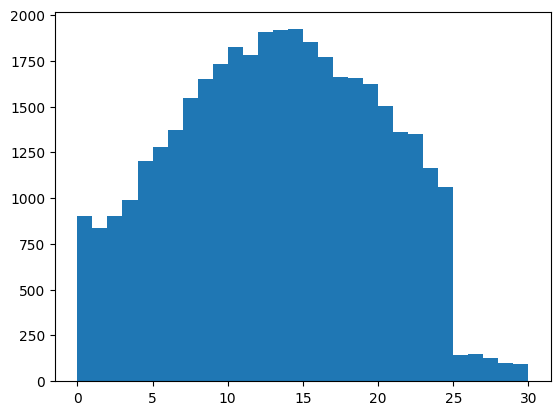

In [82]:
#How dti is behaving and what we are getting is quite interesting
plt.hist(df4.dti,bins=30)
plt.show()

In [151]:
df4['dti'].describe()

count    37382.000000
mean        13.314069
std          6.670294
min          0.000000
25%          8.190000
50%         13.400000
75%         18.590000
max         29.990000
Name: dti, dtype: float64

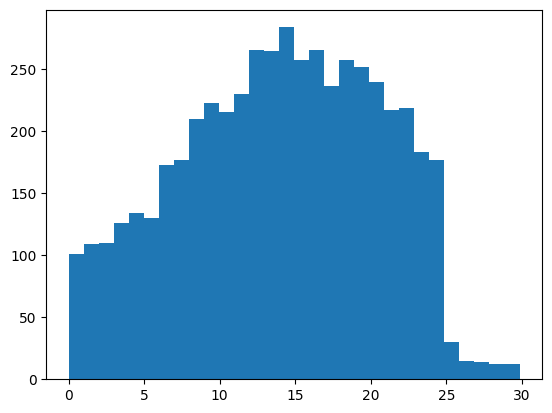

In [201]:
#relation ship between DTI and loan_status
#nothing obvious comes out.
df5=df4[(df4['loan_status'] == "Charged Off")]
plt.hist(df5.dti,bins=30)
plt.show()

In [215]:
"""
Following are main categories of loan default:
1. Service length : 1,2,3 and 10+ years
2. Purpose of loan : debt_consolidation (top category), others, credit_card, small_business and home_improvement
3. loan amount : 10000-15000 loan amount range
    Again, distribution of purpose is debt_consolidation (top category), others, credit_card, small_business and home_improvement
4. loan grades : B,C,D,E
5. home ownership : rent and mortgage
6. loan verification status : not verified

"""

'\nFollowing are main categories of loan default:\n1. Service length : 1,2,3 and 10+ years\n2. Purpose of loan : debt_consolidation (top category), others, credit_card, small_business and home_improvement\n3. loan amount : 10000-15000 loan amount range\n    Again, distribution of purpose is debt_consolidation (top category), others, credit_card, small_business and home_improvement\n4. loan grades : B,C,D,E\n5. home ownership : rent and mortgage\n6. loan verification status : not verified\n'